# **Servo Mechanism Performance Prediction Model**

## Objective :
#### The objective of the Servo Mechanism Performance Prediction Model is to develop a machine learning model that can predict the performance class of a servo mechanism based on its motor type, screw type, proportional gain, and velocity gain. By accurately predicting the performance, the model aims to assist in the optimization and tuning of servo mechanisms.

## Dataset :
"https://github.com/YBI-Foundation/Dataset/raw/main/Servo%20Mechanism.csv"

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/Servo%20Mechanism.csv")

In [3]:
df.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.7+ KB


In [5]:
df.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


In [13]:
df.shape

(167, 5)

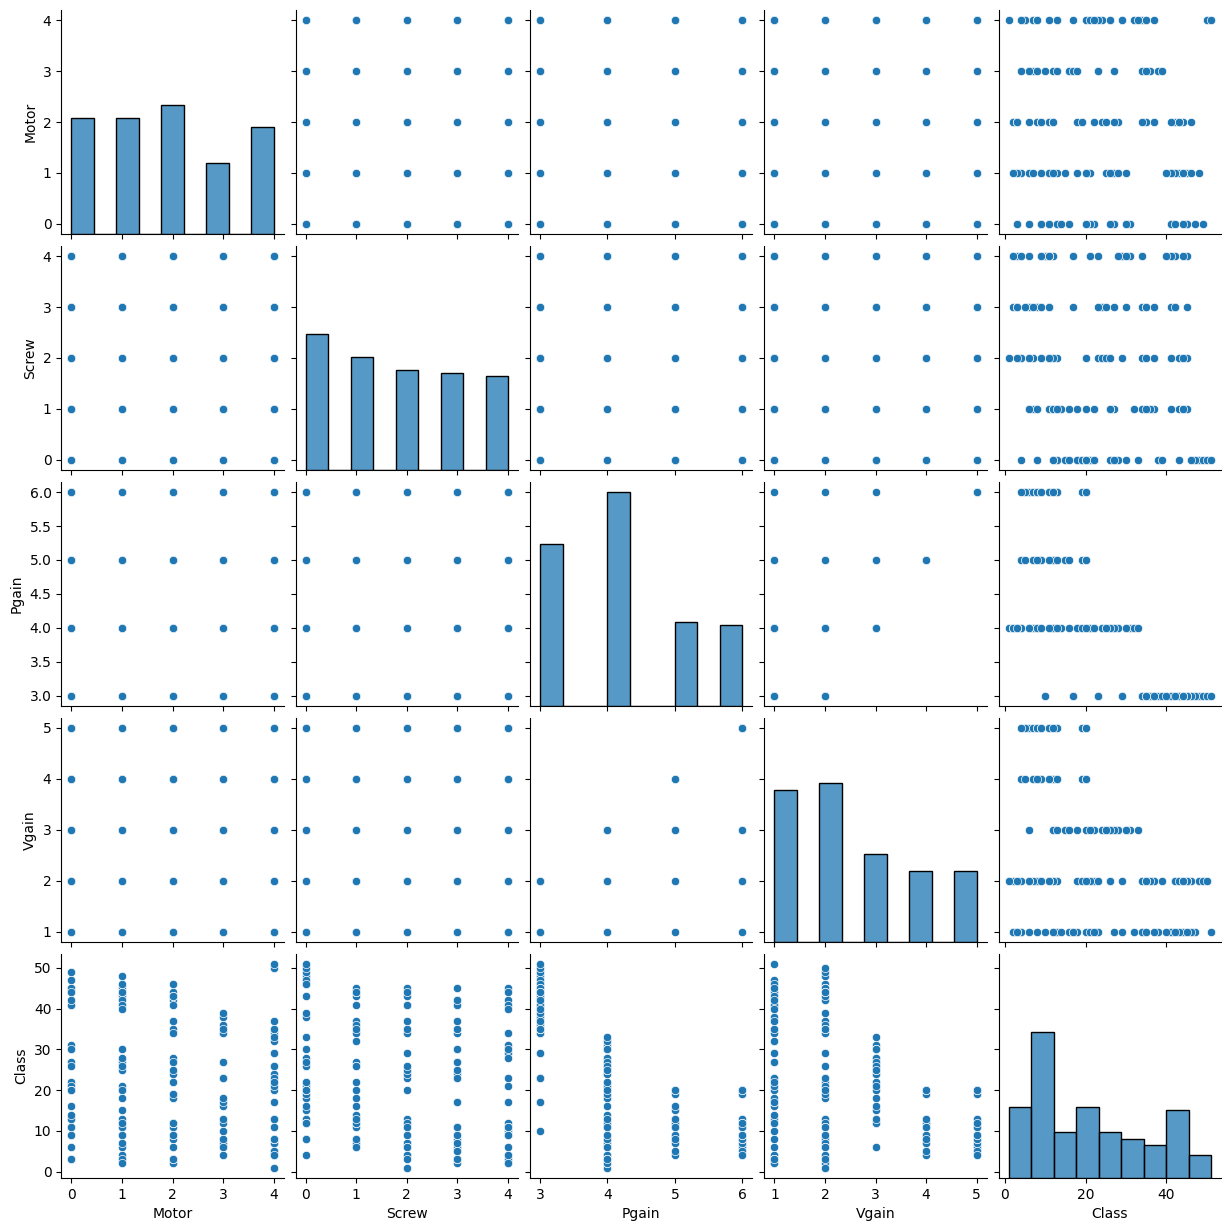

In [36]:
sns.pairplot(df)
plt.show()

In [12]:
df.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

In [14]:
df[["Motor"]].value_counts()

Motor
C        40
A        36
B        36
E        33
D        22
Name: count, dtype: int64

In [15]:
df.replace({"Motor":{"A":0,"B":1,"C":2,"D":3,"E":4}},inplace=True)

C:\Users\manav\AppData\Local\Temp\ipykernel_19488\537852518.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Motor":{"A":0,"B":1,"C":2,"D":3,"E":4}},inplace=True)


In [16]:
df[["Motor"]].value_counts()

Motor
2        40
0        36
1        36
4        33
3        22
Name: count, dtype: int64

In [17]:
df[["Screw"]].value_counts()

Screw
A        42
B        35
C        31
D        30
E        29
Name: count, dtype: int64

In [18]:
df.replace({"Screw":{"A":0,"B":1,"C":2,"D":3,"E":4}},inplace=True)

C:\Users\manav\AppData\Local\Temp\ipykernel_19488\711607856.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Screw":{"A":0,"B":1,"C":2,"D":3,"E":4}},inplace=True)


In [19]:
df[["Screw"]].value_counts()

Screw
0        42
1        35
2        31
3        30
4        29
Name: count, dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Motor   167 non-null    int64
 1   Screw   167 non-null    int64
 2   Pgain   167 non-null    int64
 3   Vgain   167 non-null    int64
 4   Class   167 non-null    int64
dtypes: int64(5)
memory usage: 6.7 KB


In [22]:
y = df["Class"]
X = df[["Screw","Motor","Pgain","Vgain"]]

In [23]:
X.shape,y.shape

((167, 4), (167,))

In [21]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=2529)

In [25]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((116, 4), (51, 4), (116,), (51,))

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lr = LinearRegression()

In [28]:
lr.fit(X_train,y_train)

LinearRegression()

In [29]:
y_pred = lr.predict(X_test)

In [30]:
y_pred.shape

(51,)

In [31]:
y_pred

array([24.55945258, 30.98765106, 18.54485477, 25.51524243, 38.56082023,
       23.52007775, 11.61947065, 20.03335614, 40.60404401, 41.7009556 ,
       13.66269443, 26.01242807, 16.50163099, 16.54663453, 21.92598051,
       22.52570646, -5.46449561, 30.68912392, 32.7323477 ,  1.41282941,
       33.97718702, 31.63543611, 33.52806048, 30.04133887, 19.38557109,
        6.49364826, 28.5528375 , 17.04382017, 25.06611589,  3.50411229,
       30.59606128, 23.67067716, 35.72188367, 32.08456265, 12.46018697,
        3.6547117 , 23.47201865, 33.03087484, 17.49294672, 37.61450804,
       27.54898855, 22.07657992, 11.51387478,  9.470651  , 30.53852451,
       28.64590014, 33.67865989,  4.60102388, 24.1198037 , 21.13026773,
       25.71390094])

In [37]:
from sklearn.metrics import mean_absolute_percentage_error

In [38]:
mean_absolute_percentage_error(y_test,y_pred)

0.8268204638174638

## Explaination :
####  This project uses a Linear Regression model to predict the performance class of a servo mechanism based on various features. The model is trained on a set of examples and then tested to see how well it can make predictions on new data. The MAPE score helps determine how accurate the model's predictions are.